# １. 強化学習モデルと本章で扱う内容について

## 1.1 強化学習モデルの概要

## 1.2 本章の構成


## 1.3 行動データのファイルに関して

## 1.4 Rコードに関して

In [147]:
system("apt-get install -y fonts-noto-cjk")

In [148]:
install.packages("tidyverse")
library(tidyverse)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [149]:
x <- c(1,2,3)
x

[1] 1 2 3

In [150]:
x[1] <- 5
x

[1] 5 2 3

In [151]:
func_A <- function(a,b){
  a + b
}

In [152]:
func_A(1,4)

[1] 5

In [153]:
# 同じ数値を繰り返す関数。以下の例では，1を5回繰り返す。
rep(1,5)

[1] 1 1 1 1 1

In [154]:
# 連続した値の生成する関数。 例は，1から5まで1間隔の値を生成。
seq(1,5,by=1)

[1] 1 2 3 4 5

In [155]:
# 要素の集合からランダムに指定した数の要素を取り出す関数。以下では，1,2,3の中から3個，ランダムに取り出す（ただし1回ずつ）。
sample(c(1,2,3),3)

[1] 3 1 2

In [156]:
# 以下では，1と0から10個の要素を，0.8:0.2の割合で取り出す。replace = TRUEで復元抽出を指定。
sample(c(0,1), 10, prob = c(0.8, 0.2), replace = TRUE)

[1] 1 0 1 1 0 0 0 0 0 1

In [157]:
# 0から1の間の一様乱数を発生させる。実行する度に値が変わる。
runif(1)

[1] 0.7762232

In [158]:
# 乱数を発生する時にシードを固定することで，同じ結果を再現できる。（123以外でも構わないが，値を変えると結果も変わる）
set.seed(123)
runif(1)

[1] 0.2875775

In [159]:
# 0.8の確率で "A", 0.2の確率で "B"。なぜなら，runif(1)が0,8以下になる確率は0.8なので。
if(0.8 > runif(1)){
  print("A")
} else {
  print("B")
}

[1] "A"


In [160]:
# 指定した数の0を要素として持つベクトルを作成
numeric(5)

[1] 0 0 0 0 0

In [161]:
# for文で各要素でsample関数の実行結果を入れる
c <- numeric(5)
for (i in 1:5){
  c[i] <- sample(c(1,2),1)
}
c

[1] 1 2 1 2 2

In [162]:
tb <- tibble(
  a = c(1,2,3),
  b = seq(1,3),
  c = rep("C",3)
)

In [163]:
tb$a

[1] 1 2 3

# ２. 本章で扱う行動課題

## 2.1 課題を体験してみよう


## 2.2 関数の作成（課題設定用コード）

In [164]:
func_TaskSetting <- function(pA = 0.8){ #pAのデフォルトは0.8に設定

  # outA: 逆転前はpAの確率で報酬(1)，1-pAの確率で報酬なし(0)。逆転後は逆
  # outB: 逆転前は1-pAの確率で報酬(1)，pAの確率で報酬なし(0)。逆転後は逆

  tibble(
    block = c(rep(1,80),rep(2,80)),# 各ブロック80試行
    trial = seq(1,160),
    outA = c(sample(c(1,0), 80, prob= c(pA, 1-pA), replace = TRUE),
             sample(c(1,0), 80, prob= c(1-pA, pA), replace = TRUE)),
    outB = c(sample(c(1,0), 80, prob= c(1-pA, pA), replace = TRUE),
             sample(c(1,0), 80, prob= c(pA, 1-pA), replace = TRUE))
    )
}

In [165]:
set.seed(123)
setting <- func_TaskSetting(0.8)

In [166]:
setting |>
  print()

# A tibble: 160 × 4
   block trial  outA  outB
   <dbl> <int> <dbl> <dbl>
 1     1     1     1     0
 2     1     2     1     0
 3     1     3     1     0
 4     1     4     0     0
 5     1     5     0     0
 6     1     6     1     0
 7     1     7     1     0
 8     1     8     0     0
 9     1     9     1     0
10     1    10     1     0
# ℹ 150 more rows


In [167]:
setting |>
  group_by(block) |> # blockごとに集計することを指定
  summarise(A = mean(outA), # outAが1の確率
            B = mean(outB)) # outBが1の確率

block,A,B
<dbl>,<dbl>,<dbl>
1,0.8125,0.1875
2,0.1875,0.8250


## 2.3 課題設定の可視化

In [168]:
gA <- ggplot(setting, aes(x = trial, y = outA))+ #データフレーム，x軸，y軸を設定
  geom_point(color = "red")+ # geom_point()で散布図を作成
  geom_vline(xintercept = 81, lty = "dashed")+ # 垂線を引く。切片は逆転する81試行目を指定
  scale_y_continuous(breaks=c(0,1))+ # y軸の目盛り設定
  scale_x_continuous(breaks=seq(0, 160, by=40))+ # x軸の目盛り設定
  theme_classic(base_size = 18)+ # 見た目の設定
  ggtitle("選択肢Aを選んだときの結果") # 図のタイトルを設定

gB <- ggplot(setting, aes(x = trial, y = outB))+
  geom_point(color = "blue")+
  geom_vline(xintercept = 81, lty = "dashed")+
  scale_y_continuous(breaks=c(0,1))+
  scale_x_continuous(breaks=seq(0, 160, by=40))+
  theme_classic(base_size = 18)+
  ggtitle("選択肢Bを選んだときの結果")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



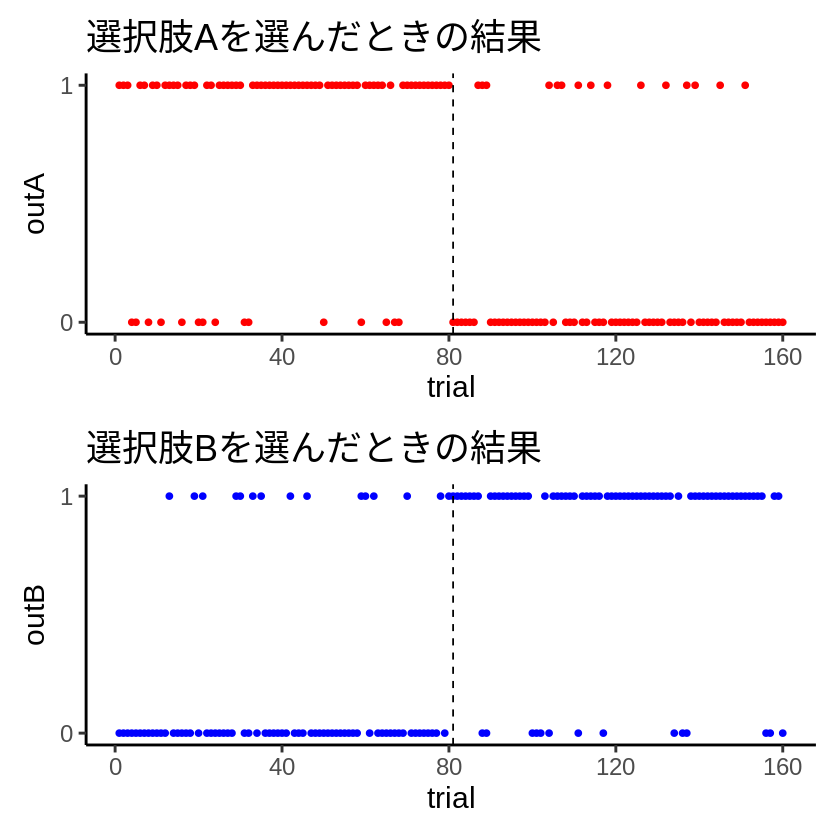

In [169]:
install.packages("patchwork")
library(patchwork)
gAB <- gA / gB # 図を縦に並べる
print(gAB)

# ３. 強化学習モデル

## 3.1 価値の更新

In [170]:
alpha <- 0.2 #学習率
Q <- 0.4 # 更新前Q値
R <- 1 # 1: 報酬あり, 0: 報酬なし

Q <- Q + alpha*(R - Q) # Q値を更新
Q # 更新後のQ値

[1] 0.52

In [171]:
alphas <- seq(0,1,0.2) # 0から1まで0.2刻みのシーケンスを作成

for (i in alphas){

  alpha <- i

  # 以下は上で示したコードと変わらない。
  Q <- 0.4 #更新前のQ値
  R <- 1
  Q <- Q + alpha*(R - Q)
  Q # 更新後のQ値

  cat("alpha:", i, ",更新後のQ値:", Q, end = "\n")
}

alpha: 0 ,更新後のQ値: 0.4 
alpha: 0.2 ,更新後のQ値: 0.52 
alpha: 0.4 ,更新後のQ値: 0.64 
alpha: 0.6 ,更新後のQ値: 0.76 
alpha: 0.8 ,更新後のQ値: 0.88 
alpha: 1 ,更新後のQ値: 1 


In [172]:
alpha <- 0.2
Q <- numeric(5) # 長さが5の数値ベクトル
Q[1] = 0.5 # Qの初期値を0.5に
R <- c(1,1,0,1,1) # 5試行分の報酬結果の系列

# 5試行目の報酬結果は計算しない
for (t in 1:4){
  #t試行目のQ値をt試行目の報酬結果で更新
  Q[t+1] = Q[t] + alpha*(R[t]-Q[t])
}

In [173]:
Q

[1] 0.5000 0.6000 0.6800 0.5440 0.6352

## 3.2 選択確率の計算

In [174]:
beta <- 5 # βの値
Q_A <- 1.0 # Aの価値
Q_B <- 0.8 # Bの価値
P_A <- 1/(1+exp(-beta*(Q_A -Q_B))) # 式#参照
P_B <- 1-P_A

cat("Aの選択確率: ", P_A, end="\n")
cat("Bの選択確率: ", P_B)

Aの選択確率:  0.7310586 
Bの選択確率:  0.2689414

## 3.3 選択

In [175]:
P_A <- 0.8 # Aを選ぶ確率

# P_Aに基づいて，選択cを決める
if(P_A > runif(1)){ # 0-1の乱数がP_Aより小さい場合
  c <- "A" # 選択(c)にAを代入
} else {
  c <- "B" # 選択(c)にBを代入
}
c

[1] "B"

In [176]:
set.seed(123)
c <- numeric(100)
P_A <- 0.8
for(i in 1:100){
  if(P_A > runif(1)){ # 0-1の乱数がP_Aより小さい場合
    c[i] <- 1
  } else {
    c[i] <- 2
  }
}

table(c)# AとBが出た回数を集計

c
 1  2 
82 18 

# ４. 行動データの生成


## 4.1 関数の作成（データ生成用コード）

In [177]:
func_DataGeneration <- function(param, setting){

  # [1] 引数のparmに基づいてパラメータを設定
  alpha <- param[1] # 学習率はparamの一つ目の値
  beta <- param[2] # 逆温度はparamの二つ目の値

  # [2] 引数のsettingに基づいて課題の設定
  outA <- setting$outA # 各試行でAを選んだ場合の結果
  outB <- setting$outB # 各試行でBを選んだ場合の結果
  trials <- setting$trial # 試行番号（1~160）
  Ntrial <- length(trials) # 試行数


  # [3] 各試行の情報を入れていく変数の設定（試行数分の整数型ベクトル）
  c <- numeric(Ntrial) # 各試行の選択を入れる変数
  r <- numeric(Ntrial) # 各試行の報酬結果を入れる変数
  Q_A <- numeric(Ntrial) # 各試行のAのQ値を入れる変数
  Q_B <- numeric(Ntrial) # 各試行のBのQ値を入れる変数
  p_A <- numeric(Ntrial) # 各試行のAの選択確率を入れる変数
  RPE <- numeric(Ntrial) # 各試行の報酬予測誤差を入れる変数

  # [4] Qの初期値の設定
  Q_A[1] <- 0.5
  Q_B[1] <- 0.5

  # [5] 選択と価値の更新
  for (t in 1:Ntrial){# for文で試行数分繰り返す。

    # [5-1]選択肢Aの選択確率
    p_A[t] <- exp(beta*(Q_A[t]))/(exp(beta*(Q_A[t])) + exp(beta*(Q_B[t])))

    # [5-2]選択確率に基づく0~1の乱数を１つ発生させ，それを受け選択を生成
    if(p_A[t] > runif(1)){ # 乱数の値がp_A（Aの選択確率）より小さいとき
      c[t] <- 1 # choice A
      r[t] <- outA[t]
      RPE[t] <- r[t]-Q_A[t]
    } else { # 乱数がp_A以上のとき
      c[t] <- 2 # choice B
      r[t] <- outB[t]
      RPE[t] <- r[t]-Q_B[t]
    }

    # [5-3]価値の更新
    if(t < Ntrial){

      if(c[t] == 1){ # Aを選択していた場合
        Q_A[t+1] <- Q_A[t] + alpha*RPE[t]
        Q_B[t+1] <- Q_B[t]
      }

      if(c[t] == 2){ # Bを選択していた場合
         Q_B[t+1] <- Q_B[t] + alpha*RPE[t]
         Q_A[t+1] <- Q_A[t]
      }
    }
  }

  # [6]結果のまとめ（戻り値）

  tibble(
    trial = trials,
    QA = Q_A,
    QB =Q_B,
    choice = c,
    reward = r,
    pA = p_A,
    pB = 1-p_A,
    RPE = RPE)
}


## 4.2 1人分のデータ生成

In [178]:
set.seed(123)
tmp_param <- c(0.2, 5)
tmp_setting <- func_TaskSetting(0.8)

In [179]:
res <- func_DataGeneration(tmp_param, tmp_setting)
print(res)

# A tibble: 160 × 8
   trial    QA    QB choice reward    pA    pB    RPE
   <int> <dbl> <dbl>  <dbl>  <dbl> <dbl> <dbl>  <dbl>
 1     1 0.5    0.5       2      0 0.5   0.5   -0.5  
 2     2 0.5    0.4       1      1 0.622 0.378  0.5  
 3     3 0.6    0.4       1      1 0.731 0.269  0.4  
 4     4 0.68   0.4       1      0 0.802 0.198 -0.68 
 5     5 0.544  0.4       1      0 0.673 0.327 -0.544
 6     6 0.435  0.4       1      1 0.544 0.456  0.565
 7     7 0.548  0.4       2      0 0.677 0.323 -0.4  
 8     8 0.548  0.32      1      0 0.758 0.242 -0.548
 9     9 0.439  0.32      1      1 0.644 0.356  0.561
10    10 0.551  0.32      2      0 0.760 0.240 -0.32 
# ℹ 150 more rows


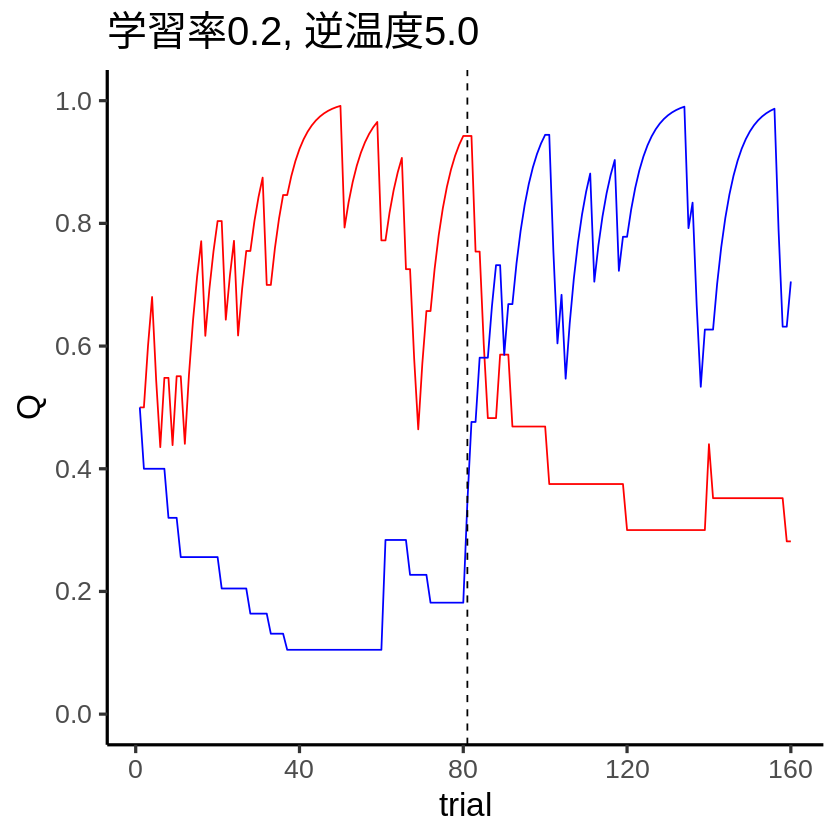

In [180]:
g <- ggplot(res, aes(x = trial, y = QA))+
  geom_line(color = "red")+ # QAを赤でプロット
  geom_line(aes(y = QB),color = "blue")+ # yの指定だけQBに変更し青でプロット
  geom_vline(xintercept = 81, lty = "dashed")+ # 81試行目に垂直線
  scale_y_continuous(breaks = seq(0, 1, by = 0.2), limit = c(0,1))+ # y軸の目盛り設定
  scale_x_continuous(breaks=seq(0, 160, by=40))+ # x軸の目盛り設定
  theme_classic(base_size = 20)+
  ylab("Q")+
  ggtitle("学習率0.2, 逆温度5.0")
print(g)

In [181]:
Nsim <- 100 # シミュレーションの回数

res100 <- tibble()
set.seed(123)
tmp_param <- c(0.2, 5)

for (i in 1:Nsim){
  tmp_setting <- func_TaskSetting()
  res <- func_DataGeneration(param = tmp_param, setting = tmp_setting) |>
    left_join(setting, by = "trial") |> # 課題の設定情報を追加
    mutate(id = i) # id列を追加
  res100 <- bind_rows(res100, res)
}

## 4.3 100人分のデータ生成

In [182]:
Nsim <- 100 # シミュレーションの回数

res100 <- tibble()
set.seed(123)
tmp_param <- c(0.2, 5)

for (i in 1:Nsim){
  tmp_setting <- func_TaskSetting()
  res <- func_DataGeneration(param = tmp_param, setting = tmp_setting) |>
    left_join(setting, by = "trial") |> # 課題の設定情報を追加
    mutate(id = i) # id列を追加
  res100 <- bind_rows(res100, res)
}

In [183]:
dim(res100) #次元数の確認

[1] 16000    12

In [184]:
print(res100)

# A tibble: 16,000 × 12
   trial    QA    QB choice reward    pA    pB    RPE block  outA  outB    id
   <int> <dbl> <dbl>  <dbl>  <dbl> <dbl> <dbl>  <dbl> <dbl> <dbl> <dbl> <int>
 1     1 0.5    0.5       2      0 0.5   0.5   -0.5       1     1     0     1
 2     2 0.5    0.4       1      1 0.622 0.378  0.5       1     1     0     1
 3     3 0.6    0.4       1      1 0.731 0.269  0.4       1     1     0     1
 4     4 0.68   0.4       1      0 0.802 0.198 -0.68      1     0     0     1
 5     5 0.544  0.4       1      0 0.673 0.327 -0.544     1     0     0     1
 6     6 0.435  0.4       1      1 0.544 0.456  0.565     1     1     0     1
 7     7 0.548  0.4       2      0 0.677 0.323 -0.4       1     1     0     1
 8     8 0.548  0.32      1      0 0.758 0.242 -0.548     1     0     0     1
 9     9 0.439  0.32      1      1 0.644 0.356  0.561     1     1     0     1
10    10 0.551  0.32      2      0 0.760 0.240 -0.32      1     1     0     1
# ℹ 15,990 more rows


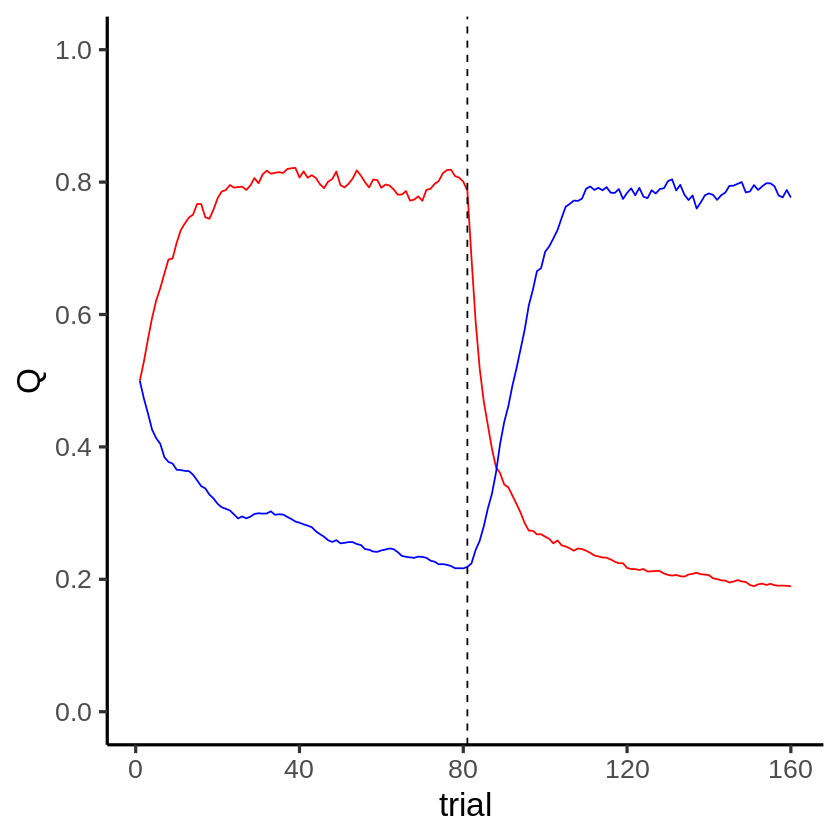

In [185]:
g <- ggplot(res100, aes(x = trial, y = QA))+
  stat_summary(geom = "line", fun = "mean", color = "red")+
  stat_summary(aes(y=QB),geom = "line", fun = "mean", color = "blue")+
  geom_vline(xintercept = 81, lty = "dashed")+ #反転試行
  scale_y_continuous(breaks = seq(0, 1, by = 0.2), limit = c(0,1))+ # y軸の設定
  scale_x_continuous(breaks=seq(0, 160, by=40))+ # x軸の設定
  ylab("Q")+
  theme_classic(base_size = 20)

print(g)

# ５. パラメータ推定


## 5.1 サンプルデータの確認

In [186]:
data <- read_csv('https://x.gd/Ne4xj')

#上記のコードでエラーが出る場合は，下記のコードを実行してください。（以下のコードの最初の#は削除します。）
#data <- read.csv('https://raw.githubusercontent.com/CPcolloquium/cp_programming_book/main/df_SimPH.csv', colClasses = c("character", rep("numeric", 5)))

Rows: 9600 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): group
dbl (5): id, block, trial, choice, reward

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [187]:
print(data)

# A tibble: 9,600 × 6
   group    id block trial choice reward
   <chr> <dbl> <dbl> <dbl>  <dbl>  <dbl>
 1 P         1     1     1      2      0
 2 P         1     1     2      1      1
 3 P         1     1     3      1      1
 4 P         1     1     4      2      0
 5 P         1     1     5      1      0
 6 P         1     1     6      1      1
 7 P         1     1     7      2      0
 8 P         1     1     8      1      0
 9 P         1     1     9      1      1
10 P         1     1    10      2      0
# ℹ 9,590 more rows


## 5.2 尤度，対数尤度


## 5.3 関数の作成（対数尤度を算出するコード）

In [188]:
func_LogLik <- function(param, data){ # 引数がsettingの代わりにdata●

  # [1] 引数のparmに基づいて学習率と逆温度を設定
  alpha <- param[1]
  beta <- param[2]

  # [2] 引数のdataに基づいて課題の設定●
  trials <- data$trial
  Ntrial <- length(trials) #試行数
  c <- data$choice # 実際の選択
  r <- data$reward # 実際の報酬結果

  # [3]各試行の情報を入れていく変数●
  Q_A <- numeric(Ntrial) # 各試行のAのQ値を入れる変数
  Q_B <- numeric(Ntrial) # 各試行のBのQ値を入れる変数
  p_A <- numeric(Ntrial) # 各試行のAの選択確率を入れる変数
  RPE <- numeric(Ntrial)

  # [4] Qの初期値を設定
  Q_A[1] <- 0.5
  Q_B[1] <- 0.5

  # [5] 選択と価値の更新
  logLik <- 0 #対数尤度の初期値を0とする●

  for (t in 1:Ntrial){

    # [5-1]選択肢Aの選択確率
    p_A[t] <- exp(beta*(Q_A[t]))/(exp(beta*(Q_A[t])) + exp(beta*(Q_B[t])))
    #p_A[t] = 1/(1 + exp(-beta*(Q_A[t]-Q_B[t])))

    # [5-2]選択に基づいてRPEの計算と，対数尤度の更新●
    if (c[t] == 1){ # Aを選択していた場合
      RPE[t] <- r[t]-Q_A[t]
      logLik <- logLik + log(p_A[t])
    }
    if (c[t] == 2){ # Bを選択していた場合
      RPE[t] <- r[t]-Q_B[t]
      logLik <- logLik + log(1-p_A[t])
    }

    # [5-3]価値の更新
    if(t < Ntrial){

      if(c[t] == 1){ # Aを選択していた場合
        Q_A[t+1] <- Q_A[t] + alpha*RPE[t]
        Q_B[t+1] <- Q_B[t]
      }

      if(c[t] == 2){ # Bを選択していた場合
        Q_B[t+1] <- Q_B[t] + alpha*RPE[t]
        Q_A[t+1] <- Q_A[t]
      }
    }
  }
  # [6]戻り値●
  logLik # 対数尤度
}

In [189]:
data1 <- data |>
  filter(id == 1)

In [190]:
# 逆温度を1から8まで0.05刻みで設定する
betas <- seq(0.05, 8, by=0.05)

# 逆温度の値ごとに計算された対数尤度の値を入れていく変数
LogLik_1 <- NULL

for (beta in betas){
  param <- c(0.2, beta)
  tmp <- func_LogLik(param = param, data = data1)
  LogLik_1 <- c(LogLik_1, tmp)
}

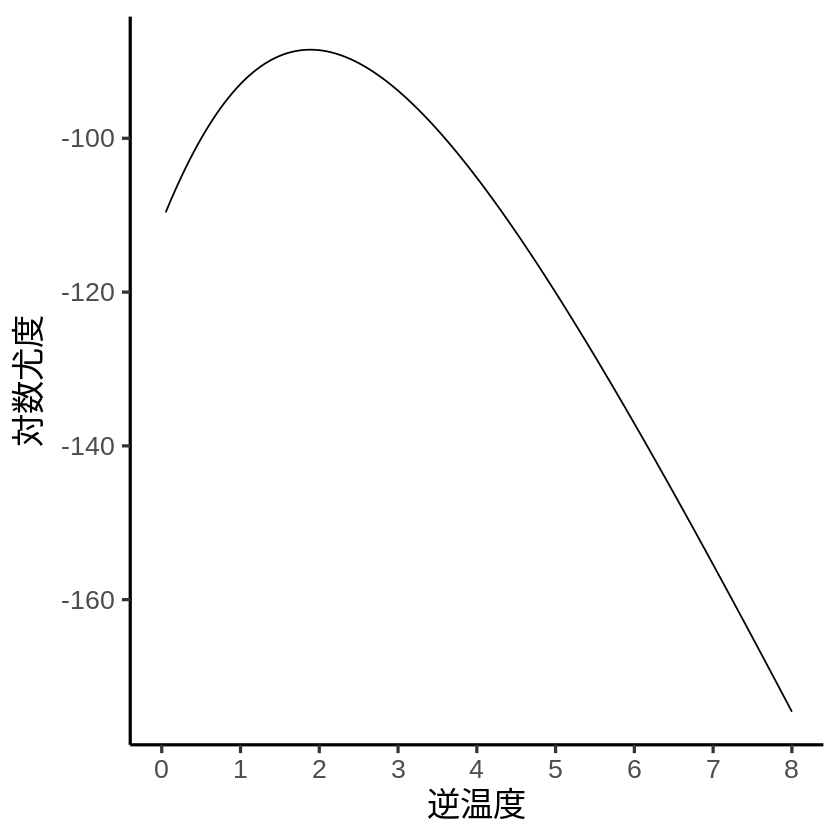

In [191]:
# ggplotを使うので，まずはデータフレームを作成
df <- tibble(
  beta = betas,
  LogLik_1 = LogLik_1,
)

ggplot(df, aes(x = beta, y = LogLik_1))+
  geom_line()+
  scale_x_continuous(limits = c(0,8), breaks = seq(0,8,by=1))+
  xlab("逆温度")+
  ylab("対数尤度")+
  theme_classic(base_size = 20)

In [192]:
# 対数尤度が最大になったインデックスを確認し，kとする
k <- which.max(LogLik_1)
# そのときの逆温度を求める
betas[k]

[1] 1.9

## 5.4 optim関数の紹介

In [193]:
func_negLogLik <- function(param, data){
  -func_LogLik(param, data)
}

In [194]:
# 学習率と逆温度の初期値として0~1の乱数を2つ生成
initparam <- runif(2,0,1)

# 各パラメータの下限と上限
lblist <- c(0,0) #学習率も逆温度も下限は0
ublist <- c(1,20) #学習率の上限は1，逆温度の上限は20

# optim関数を使ったパラメータ推定
est <- optim(par = initparam, # パラメータの初期値
             fn = func_negLogLik,
             method="L-BFGS-B",
             lower = lblist, # パラメータの下限
             upper = ublist, # パラメータの上限
             data = data1)

In [195]:
est$par

[1] 0.1607721 2.0089401

In [196]:
est$value

[1] 88.32542

## 5.5 関数の作成（最尤推定を行うコード）

In [197]:
func_ParamFit <- function(data) {

  # [1] 負の対数尤度の初期値は無限大にしておく
  neglogLik <- Inf

  # [2] optim関数を使った最尤推定を5回繰り返す
  for (idx in 1:5) { #ランダムな初期値で5回推定を行う

    # [2-1] 推定ごとにランダムに初期値を設定
    initparam <- runif(2,0,1) # [0,1]の一様乱数を2つ生成

    # [2-2] 各パラメータの下限と上限
    lblist <- c(0,0) # 学習率も逆温度も下限は0
    ublist <- c(1,20) # 学習率の上限は1，逆温度の上限は20

    # [2-3] optim 関数を使ったパラメータ推定
    est <- optim(par = initparam, #パラメータの初期値
                 fn = func_negLogLik,
                 method="L-BFGS-B",
                 lower = lblist, #パラメータの下限
                 upper = ublist, #パラメータの上限
                 control = list(trace=0), # trace=0だと出力を最小限
                 data = data)

    # [2-4] 結果の出力（途中経過の確認用）
    cat("id:", data$id[1], "NegLogLik:", round(est$value,2), "Par:",round(est$par,2),"\n")

    # [2-5] 負の対数尤度が最小になったときのみ記録
    if(est$value < neglogLik){
        neglogLik <- est$value # 負の対数尤度（negative log likelihood）
        paramest <- est$par # 推定されたパラメータ値
    }
  }

  # [3] 結果のまとめ

  df <- tibble(
    id = data$id[1], # data$idは全て同じ値なので，1つ目の要素だけ取る
    group = data$group[1], # data$groupは全て同じ値なので，1つ目の要素だけ取る
    neglogLik = neglogLik
  )

  for (i in 1:length(paramest)){
    df[paste0("param", i)] <- paramest[i]
  }

  # [4] 戻り値
  df
}

## 5.6 パラメータ推定の実行

In [198]:
res <- func_ParamFit(data1)

id: 1 NegLogLik: 88.33 Par: 0.16 2.01 
id: 1 NegLogLik: 88.33 Par: 0.16 2.01 
id: 1 NegLogLik: 88.33 Par: 0.16 2.01 
id: 1 NegLogLik: 88.33 Par: 0.16 2.01 
id: 1 NegLogLik: 88.33 Par: 0.16 2.01 


In [199]:
print(res)

# A tibble: 1 × 5
     id group neglogLik param1 param2
  <dbl> <chr>     <dbl>  <dbl>  <dbl>
1     1 P          88.3  0.161   2.01


In [200]:
resAll <- NULL # ここに，個々の推定結果を入れていく

for (i in unique(data$id)){ # unique(data$id)は，dataのid列のidの一覧を重複なしで取ってくる。
  res <- func_ParamFit(data |> filter(id == i)) # idがiのデータを引数にしてパラメータ推定
  resAll <- bind_rows(resAll,res) # resAllに
}

id: 1 NegLogLik: 88.33 Par: 0.16 2.01 
id: 1 NegLogLik: 88.33 Par: 0.16 2.01 
id: 1 NegLogLik: 88.33 Par: 0.16 2.01 
id: 1 NegLogLik: 88.33 Par: 0.16 2.01 
id: 1 NegLogLik: 88.33 Par: 0.16 2.01 
id: 2 NegLogLik: 85.26 Par: 0.24 2.17 
id: 2 NegLogLik: 85.26 Par: 0.24 2.17 
id: 2 NegLogLik: 85.26 Par: 0.24 2.17 
id: 2 NegLogLik: 85.26 Par: 0.24 2.17 
id: 2 NegLogLik: 85.26 Par: 0.24 2.17 
id: 3 NegLogLik: 74.01 Par: 0.1 3.21 
id: 3 NegLogLik: 74.01 Par: 0.1 3.21 
id: 3 NegLogLik: 74.01 Par: 0.1 3.21 
id: 3 NegLogLik: 74.01 Par: 0.1 3.21 
id: 3 NegLogLik: 74.01 Par: 0.1 3.21 
id: 4 NegLogLik: 89.98 Par: 0.2 2.13 
id: 4 NegLogLik: 89.98 Par: 0.2 2.13 
id: 4 NegLogLik: 89.98 Par: 0.2 2.13 
id: 4 NegLogLik: 89.98 Par: 0.2 2.13 
id: 4 NegLogLik: 89.98 Par: 0.2 2.13 
id: 5 NegLogLik: 93.56 Par: 0.12 2.02 
id: 5 NegLogLik: 93.56 Par: 0.12 2.02 
id: 5 NegLogLik: 93.56 Par: 0.12 2.02 
id: 5 NegLogLik: 93.56 Par: 0.12 2.02 
id: 5 NegLogLik: 93.56 Par: 0.12 2.02 
id: 6 NegLogLik: 81.37 Par: 0.67 1.

In [201]:
resAll |>
  group_by(group) |>
  summarise(alpha = mean(param1),
            beta = mean(param2))

group,alpha,beta
<chr>,<dbl>,<dbl>
H,0.2110996,6.034150
P,0.1911653,2.269356


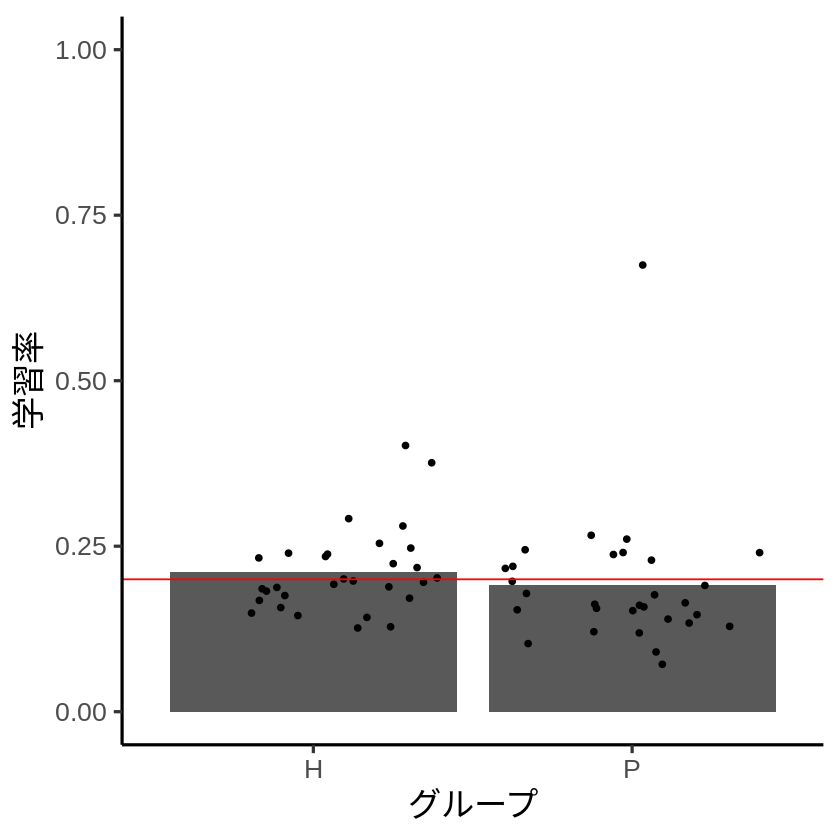

In [202]:
ggplot(resAll, aes(x = group, y = param1))+
  stat_summary(geom = "bar", fun = "mean")+ # 平均値の棒グラフ
  geom_jitter()+ # 個々の推定値のプロットを重ねる
  geom_hline(yintercept = 0.2, color = "red")+ # 真値を水平線でプロット
  ylim(0,1.0)+
  xlab("グループ")+
  ylab("学習率")+
  theme_classic(base_size = 20)

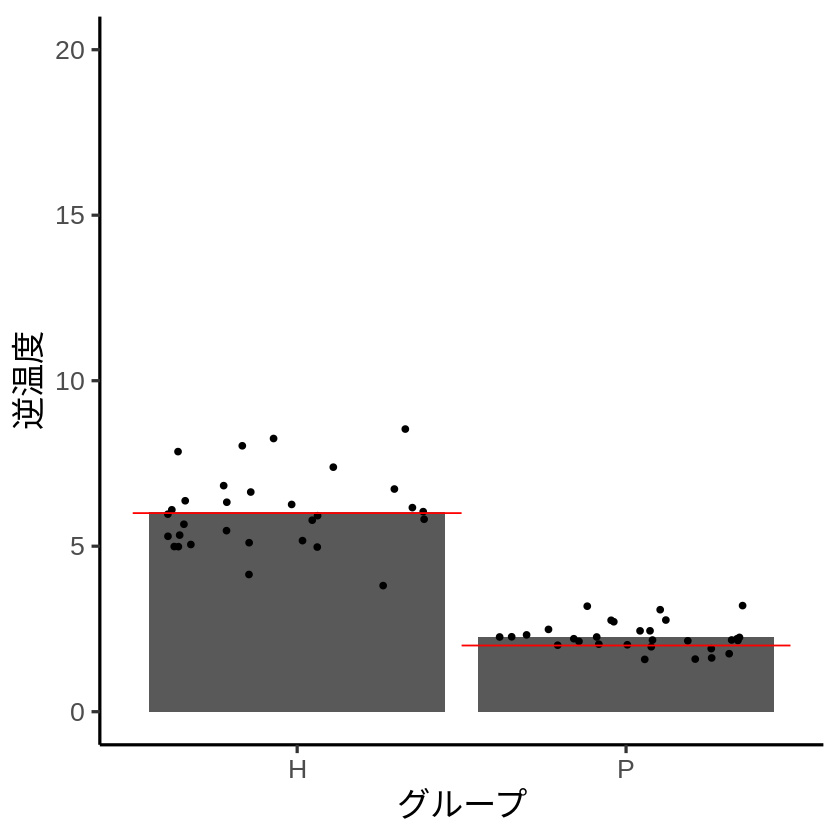

In [203]:
ggplot(resAll, aes(x = group, y = param2))+
  stat_summary(geom = "bar", fun = "mean")+ # 平均値の棒グラフ
  geom_jitter()+ # 個々の推定値のプロットを重ねる
  annotate("segment", x = 0.5, xend = 1.5, y = 6, yend = 6, color = "red")+ # Hの真値の線
  annotate("segment", x = 1.5, xend = 2.5, y = 2, yend = 2, color = "red")+ # Pの真値の線
  xlab("グループ")+
  ylim(0,20)+
  ylab("逆温度")+
  theme_classic(base_size = 20)

# ６. パラメータリカバリー

In [204]:
set.seed(123)
setting <- func_TaskSetting()

In [205]:
set.seed(123)
Nsim =100 # シミュレーションの回数
df_pararecovery <- tibble() # ここに結果を記録していく

for (i in 1:Nsim){

  # 20人分毎に進捗の表示
  if(i %% 20 == 0){
    cat("progress: ", i,'/',Nsim, end = "\n")
  }

  # [1] 真値の設定
  true_alpha <- runif(1,0,1) # 0から1までの範囲でランダムに1個の値を生成
  true_beta <- rexp(1,rate = 1/10) # 平均10の指数分布から1個の値を生成
  tmp_param <- c(true_alpha, true_beta)

  # [2] 行動データ生成
  tmp_data <- func_DataGeneration(param = tmp_param, setting = setting)

  #groupとidの情報を追加
  tmp_data <- tmp_data |>
    mutate(group = "Simulation",
           id = i)

  # [3]パラメータ推定
  res_parafit <- func_ParamFit(data = tmp_data)

  # [4] 結果の記録
  df <- tibble(
    sim = i,
    true_alpha = true_alpha,
    true_beta = true_beta,
    est_alpha = res_parafit$param1, # 学習率の推定値,
    est_beta = res_parafit$param2, # 逆温度の推定値,
  )
  df_pararecovery <- bind_rows(df_pararecovery,df)
}

id: 1 NegLogLik: 24.66 Par: 0.25 7.87 
id: 1 NegLogLik: 24.66 Par: 0.25 7.87 
id: 1 NegLogLik: 24.66 Par: 0.25 7.87 
id: 1 NegLogLik: 24.66 Par: 0.25 7.87 
id: 1 NegLogLik: 24.66 Par: 0.25 7.87 
id: 2 NegLogLik: 33.77 Par: 0.83 4.61 
id: 2 NegLogLik: 33.77 Par: 0.83 4.61 
id: 2 NegLogLik: 33.77 Par: 0.83 4.61 
id: 2 NegLogLik: 33.77 Par: 0.83 4.61 
id: 2 NegLogLik: 33.77 Par: 0.83 4.61 
id: 3 NegLogLik: 7.7 Par: 0.68 20 
id: 3 NegLogLik: 7.7 Par: 0.68 20 
id: 3 NegLogLik: 7.7 Par: 0.68 20 
id: 3 NegLogLik: 7.7 Par: 0.68 20 
id: 3 NegLogLik: 7.7 Par: 0.68 20 
id: 4 NegLogLik: 19.35 Par: 0.36 7.06 
id: 4 NegLogLik: 19.35 Par: 0.36 7.06 
id: 4 NegLogLik: 19.35 Par: 0.36 7.06 
id: 4 NegLogLik: 19.35 Par: 0.36 7.06 
id: 4 NegLogLik: 19.35 Par: 0.36 7.06 
id: 5 NegLogLik: 24.95 Par: 0.55 6.92 
id: 5 NegLogLik: 24.95 Par: 0.55 6.92 
id: 5 NegLogLik: 24.95 Par: 0.55 6.92 
id: 5 NegLogLik: 24.95 Par: 0.55 6.92 
id: 5 NegLogLik: 24.95 Par: 0.55 6.92 
id: 6 NegLogLik: 5.63 Par: 0.36 20 
id: 6 Neg

In [206]:
print(df_pararecovery)

# A tibble: 100 × 5
     sim true_alpha true_beta est_alpha est_beta
   <int>      <dbl>     <dbl>     <dbl>    <dbl>
 1     1      0.288     5.77      0.255    7.87 
 2     2      0.864     4.93      0.827    4.61 
 3     3      0.486    11.7       0.679   20    
 4     4      0.455     5.40      0.362    7.06 
 5     5      0.479     7.08      0.546    6.92 
 6     6      0.424    31.3       0.357   20    
 7     7      0.448    14.3       0.579   20    
 8     8      0.487     0.449     1        0.301
 9     9      0.612     9.39      0.700   10.3  
10    10      0.396    12.5       0.315   14.9  
# ℹ 90 more rows


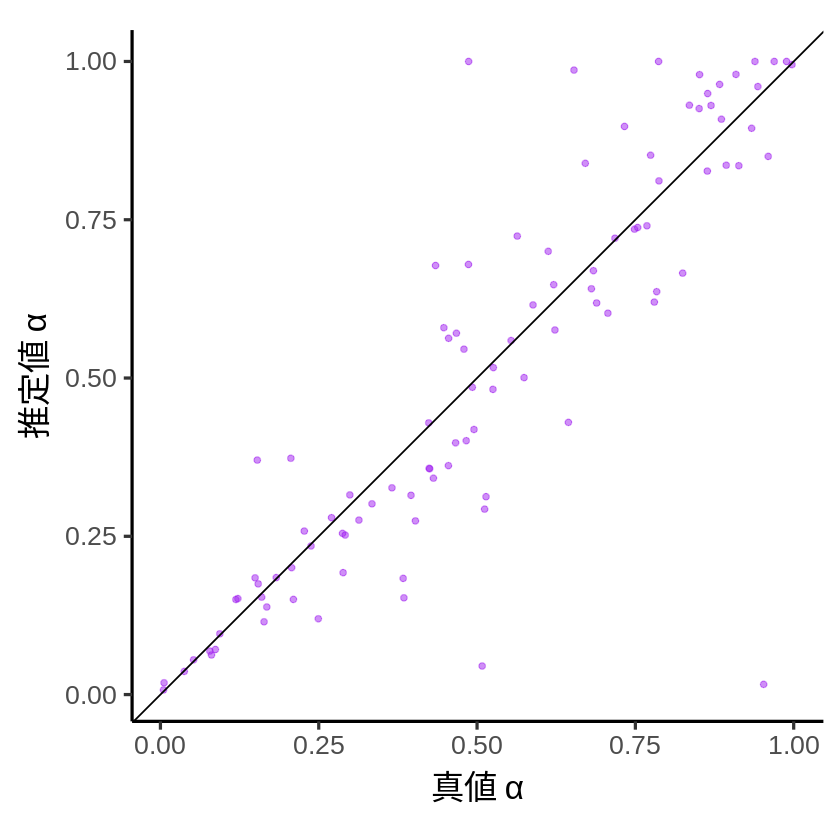

In [207]:
ggplot(df_pararecovery,aes(x=true_alpha,y=est_alpha))+
  geom_point(col = "purple", alpha = 0.5)+ # alphaで透明度を指定
  geom_abline(slope = 1, col = "black")+ # 真値と推定値が一致する場合
  xlab(expression(paste("真値 ", alpha)))+ # ギリシャ文字の表示にはexpression
  ylab(expression(paste("推定値 ", alpha)))+
  theme_classic(base_size = 20)+
  theme(aspect.ratio=1) # グラフの縦横比を1:1に

In [208]:
cor.test(df_pararecovery$true_alpha, df_pararecovery$est_alpha)


	Pearson's product-moment correlation

data:  df_pararecovery$true_alpha and df_pararecovery$est_alpha
t = 17.563, df = 98, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.8140102 0.9115828
sample estimates:
      cor 
0.8711443 


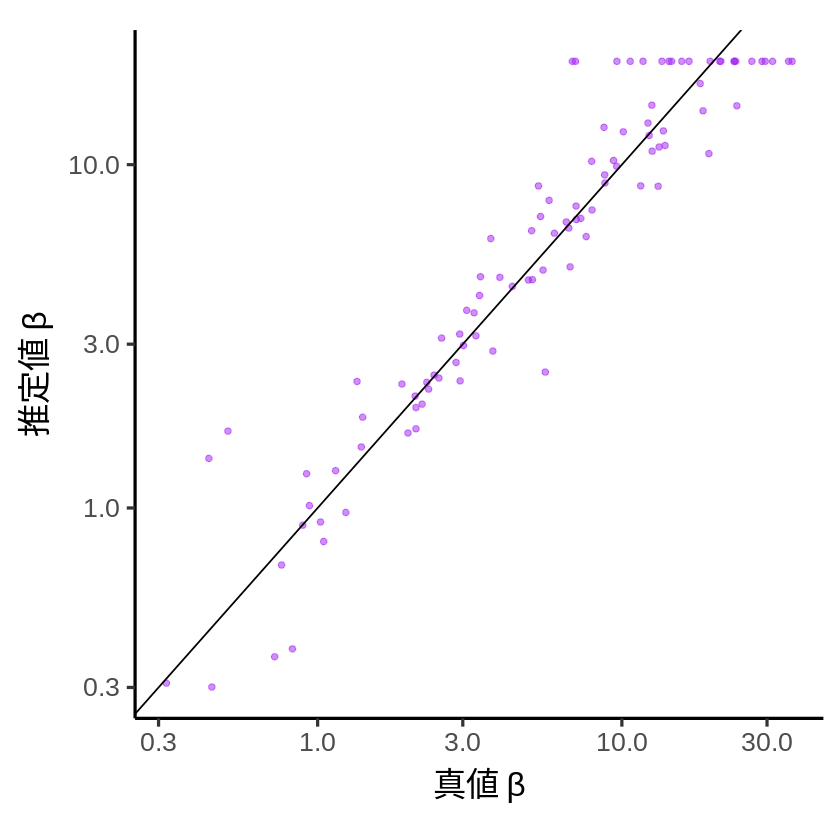

In [209]:
ggplot(df_pararecovery,aes(x=true_beta,y=est_beta))+
  geom_point(col = "purple", alpha = 0.5)+ # alphaで透明度を指定
  geom_abline(slope = 1, col = "black")+ # 真値と推定値が一致する場合
  xlab(expression(paste("真値 ", beta)))+ # ギリシャ文字の表示にはexpression
  ylab(expression(paste("推定値 ", beta)))+
  scale_x_log10()+ #対数軸に変更
  scale_y_log10()+
  theme_classic(base_size = 20)+
  theme(aspect.ratio=1) # グラフの縦横比を1:1に

In [210]:
cor.test(df_pararecovery$true_beta, df_pararecovery$est_beta)


	Pearson's product-moment correlation

data:  df_pararecovery$true_beta and df_pararecovery$est_beta
t = 16.304, df = 98, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.7911816 0.9000706
sample estimates:
      cor 
0.8547669 


# ７. モデル比較

## 7.1 学習率の非対称性を組み込んだモデル

In [211]:
func_LogLik <- function(param, data, model = "Model1"){# modelを追加

  # [1] 引数のmodelとparamとに基づいてパラメータを設定
  if(model == "Model1"){
    alpha <- param[1]
    beta <- param[2]
  } else if (model == "Model2"){
    alphaP <- param [1] # 報酬予測誤差が正の場合の学習率
    alphaN <- param [2] # 報酬予測誤差が負の場合の学習率
    beta <- param [3]
  }

  # [2] 引数のdataに基づいて課題の設定
  trials <- data$trial
  Ntrial <- length(trials) #試行数
  c <- data$choice # 実際の選択
  r <- data$reward # 実際の報酬結果

  # [3]各試行の情報を入れていく変数
  Q_A <- numeric(Ntrial) # 各試行のAのQ値を入れる変数
  Q_B <- numeric(Ntrial) # 各試行のBのQ値を入れる変数
  p_A <- numeric(Ntrial) # 各試行のAの選択確率を入れる変数
  RPE <- numeric(Ntrial)

  # [4] Qの初期値を設定
  Q_A[1] <- 0.5
  Q_B[1] <- 0.5

  # [5] 選択と価値の更新
  logLik <- 0 #対数尤度の初期値を0とする

  for (t in 1:Ntrial){

    # [5-1]選択肢Aの選択確率
    p_A[t] <- exp(beta*(Q_A[t]))/(exp(beta*(Q_A[t])) + exp(beta*(Q_B[t])))
    #p_A[t] <- 1/(1 + exp(-beta*(Q_A[t]-Q_B[t])))

    # [5-2]選択に基づいてRPEの計算と，対数尤度の更新
    if (c[t] == 1){ # Aを選択していた場合
      RPE[t] <- r[t]-Q_A[t]
      logLik <- logLik + log(p_A[t])
    }
    if (c[t] == 2){ # Bを選択していた場合
      RPE[t] <- r[t]-Q_B[t]
      logLik <- logLik + log(1-p_A[t])
    }

    # [5-3]価値の更新
    if(t < Ntrial){

      # Model2の場合はRPEの正負による条件分岐
      if(model == "Model2" && RPE[t] >= 0){
        alpha <- alphaP
      } else if (model == "Model2" && RPE[t] < 0) {
        alpha <- alphaN
      }

      if(c[t] == 1){ # Aを選択していた場合
        Q_A[t+1] <- Q_A[t] + alpha*RPE[t]
        Q_B[t+1] <- Q_B[t]
      }

      if(c[t] == 2){ # Bを選択していた場合
        Q_B[t+1] <- Q_B[t] + alpha*RPE[t]
        Q_A[t+1] <- Q_A[t]
      }
    }
  }
  # [6]結果の出力
  return(logLik)
}

In [212]:
func_negLogLik <- function(param, data, model = "Model1"){
  -func_LogLik(param, data, model)
}

In [213]:
func_ParamFit <- function(data, model = "Model1") {

  # [1] 負の対数尤度の初期値は無限大にしておく。
  neglogLik <- Inf

  # [2] optim関数を使った最尤推定を5回繰り返す
  for (idx in 1:5) { #ランダムな初期値で5回推定を行う

    # [2-1] 推定ごとにランダムに初期値を設定
    if(model == "Model1"){
      initparam <- runif(2,0,1) # パラメータ数が2つなので初期値も2つ
    } else if (model == "Model2"){
      initparam <- runif(3,0,1) # パラメータ数が3つなので初期値も3つ
    }

    # [2-2] 各パラメータの下限と上限
    if(model == "Model1"){
      lblist <- c(0,0)  # α, βの下限
      ublist <- c(1,20) # α, βの上限
    } else if (model == "Model2"){
      lblist <- c(0,0,0)  # αP，αN, βの下限
      ublist <- c(1,1,20) # αP，αN, βの上限
    }

    # [2-3] optim 関数を使ったパラメータ推定
    est <- optim(par = initparam, #パラメータの初期値
                 fn = func_negLogLik,
                 method="L-BFGS-B",
                 lower = lblist, #パラメータの下限
                 upper = ublist, #パラメータの上限
                 control = list(trace=0), # trace=0だと出力を最小限
                 data = data,
                 model = model)

    # [2-4] 結果の出力（途中経過の確認用）
    #cat("id:",data$id[1] ,"NegLogLik:", round(est$value,2), "Par:", round(est$par,2),"\n")

    # [2-5] 負の対数尤度が最小になったときのみ記録
    if(est$value < neglogLik){# 負の対数尤度が最小になったときのみ記録
        neglogLik <- est$value # 負の対数尤度（negative log likelihood）
        paramest <- est$par # 推定されたパラメータ値
    }
  }

  # [3] 結果のまとめ
  df <- tibble(
    id = data$id[1],#data$idは全て同じ値なので，1つ目の要素だけ取る
    group = data$group[1], #data$groupは全て同じ値なので，1つ目の要素だけ取る
    neglogLik = neglogLik
  )

  for (i in 1:length(paramest)){
    df[paste0("param", i)] <- paramest[i]
  }

  # [4] 戻り値
  df
}

## 7.2 モデル比較の実行

In [214]:
data <- read_csv('https://x.gd/Ne4xj')

#上記のコードでエラーが出る場合は，下記のコードを実行してください。（以下のコードの最初の#は削除します。）
#data <- read.csv('https://raw.githubusercontent.com/CPcolloquium/cp_programming_book/main/df_SimPH.csv', colClasses = c("character", rep("numeric", 5)))

Rows: 9600 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): group
dbl (5): id, block, trial, choice, reward

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [215]:
df_M1 <- tibble()

for (i in unique(data$id)){
  tmp_data <- data |> filter(id == i)
  res <- func_ParamFit(tmp_data, model = "Model1")
  df_M1 <- bind_rows(df_M1,res)
}

In [216]:
df_M1 <- df_M1 |>
  mutate(AIC = 2*neglogLik + 2*2, #パラメータ数は2
         BIC = 2*neglogLik + 2*log(160))

In [217]:
df_M2 <- tibble()

for (i in unique(data$id)){
  tmp_data <- data |> filter(id == i)
  res <- func_ParamFit(tmp_data, model = "Model2")
  df_M2 <- bind_rows(df_M2,res)
}

In [218]:
df_M2 <- df_M2 |>
  mutate(AIC = 2*neglogLik + 2*3, #パラメータ数は3
         BIC = 2*neglogLik + 3*log(160))

In [219]:
print(paste("[Model1] AIC:", sum(df_M1$AIC) |> round(), ", BIC:", sum(df_M1$BIC) |> round()))
print(paste("[Model2] AIC:", sum(df_M2$AIC) |> round(), ", BIC:", sum(df_M2$BIC) |> round()))

[1] "[Model1] AIC: 8006 , BIC: 8375"
[1] "[Model2] AIC: 8051 , BIC: 8605"
